# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [29]:
NUM_POINTS = 1500    # DEBUG 1500 to 15
BASE_URL = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"


In [30]:
#TMP
Paris_URL = f"{BASE_URL}&q=Paris"
Paris_URL

'https://api.openweathermap.org/data/2.5/weather?appid=eebdb22b330bd380f56f3922998eba3b&units=metric&q=Paris'

In [31]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=NUM_POINTS)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=NUM_POINTS)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
#delet before submit
print(cities)

['poso', 'adamstown', 'olonkinbyen', 'leshan', 'edinburgh of the seven seas', 'chagoda', 'acarau', 'malango', 'west island', 'iqaluit', 'thompson', 'mata-utu', 'tolanaro', 'udachny', 'lepsy', 'college', 'stanley', 'alofi', 'tadine', 'maumere', 'arkhara', 'mairang', 'port-aux-francais', 'qaqortoq', 'bilibino', 'khash', 'pangai', 'invercargill', 'tucuma', 'nova sintra', 'anadyr', 'grytviken', 'porto novo', 'tiksi', 'talnakh', 'taiohae', 'lagoa', 'lata', 'ribeira grande', 'veinticinco de mayo', 'karratha', 'blackmans bay', 'lensk', 'port alfred', 'giza', 'bethel', 'arraial do cabo', 'kingscliff', 'whitehorse', 'waitangi', 'patigi', 'tranovaho', 'tofol', 'puerto natales', 'borogontsy', 'punta arenas', 'bredasdorp', 'nieuw amsterdam', 'sitka', 'camocim', 'klyuchi', 'cabo san lucas', 'slatina', 'east london', 'mount gambier', 'ushuaia', 'alotau', 'margaret river', 'klaksvik', 'queenstown', 'el calafate', 'vila franca do campo', 'gaiman', 'saudarkrokur', 'flying fish cove', 'lebu', 'yellowkni

In [33]:
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    #print(city) 


    # Create endpoint URL with each city
    city_url = f"{BASE_URL}&q={city.replace(' ', '+')}"
    #print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url)
        city_weather = city_response.json()
        #print(type(city_weather), city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({ "City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                            })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | poso
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | leshan
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | chagoda
Processing Record 7 of Set 1 | acarau
Processing Record 8 of Set 1 | malango
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | mata-utu
Processing Record 13 of Set 1 | tolanaro
Processing Record 14 of Set 1 | udachny
Processing Record 15 of Set 1 | lepsy
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | alofi
Processing Record 19 of Set 1 | tadine
Processing Record 20 of Set 1 | maumere
Processing Record 21 of Set 1 | arkhara
Processing Record 22 of Set 1 | mairang
Processing Record 23 of Set 1 | port-aux-franc

In [34]:
#Prac
#city_weather


In [35]:
#city_data

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [37]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,poso,-1.3959,120.7524,31.16,61,92,2.25,ID,1727318213
1,adamstown,-25.0660,-130.1015,20.65,90,91,7.95,PN,1727318214
2,olonkinbyen,70.9221,-8.7187,-0.61,84,100,6.64,SJ,1727318215
3,leshan,29.5623,103.7639,29.70,58,100,0.67,CN,1727318217
4,edinburgh of the seven seas,-37.0676,-12.3116,13.90,85,100,8.12,SH,1727318218


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [39]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,poso,-1.3959,120.7524,31.16,61,92,2.25,ID,1727318213
1,adamstown,-25.0660,-130.1015,20.65,90,91,7.95,PN,1727318214
2,olonkinbyen,70.9221,-8.7187,-0.61,84,100,6.64,SJ,1727318215
3,leshan,29.5623,103.7639,29.70,58,100,0.67,CN,1727318217
4,edinburgh of the seven seas,-37.0676,-12.3116,13.90,85,100,8.12,SH,1727318218


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

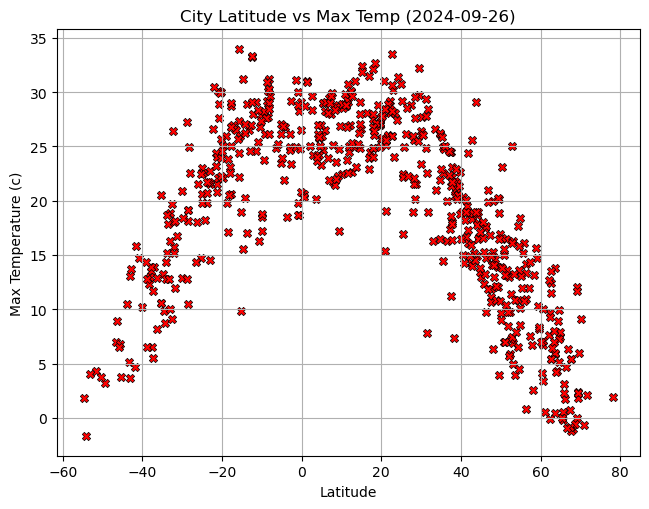

In [40]:
# Build scatter plot for latitude vs. temperature
def build_scatter(x,y):
    plt.scatter(city_data_df[x], city_data_df[y], c="red", marker="X", edgecolor="black", linewidths=0.5)
    plt.tight_layout()
    plt.grid()

# Incorporate the other graph properties
build_scatter("Lat", "Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.title(f"City Latitude vs Max Temp ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

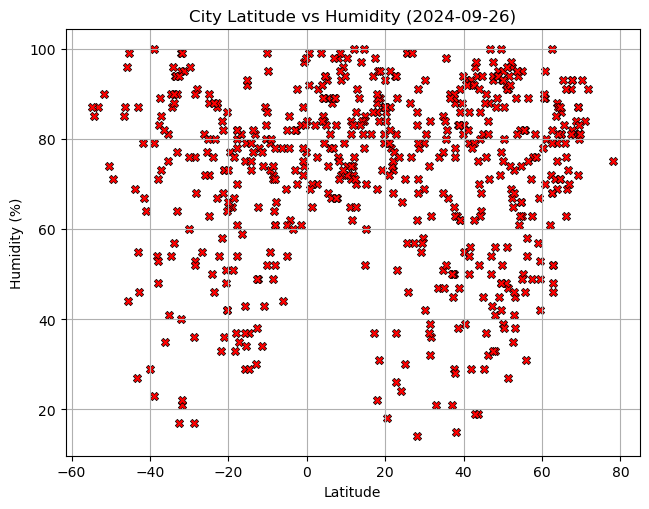

In [41]:
# Build the scatter plots for latitude vs. humidity
build_scatter("Lat", "Humidity")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

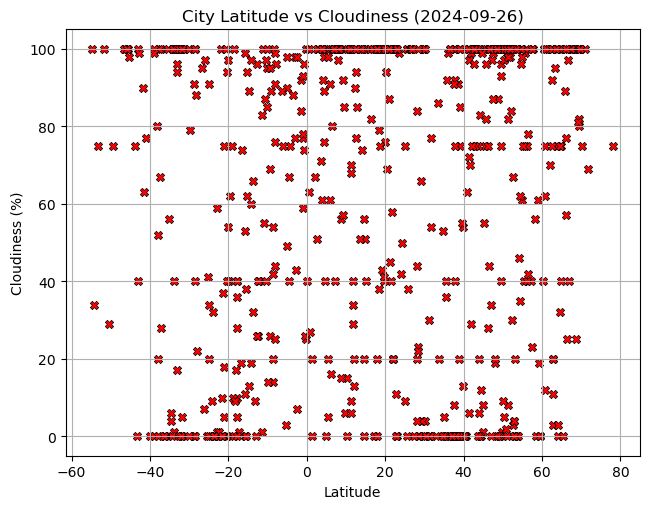

In [42]:
# Build the scatter plots for latitude vs. cloudiness
build_scatter("Lat", "Cloudiness")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig3.png", bbox_inches="tight")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

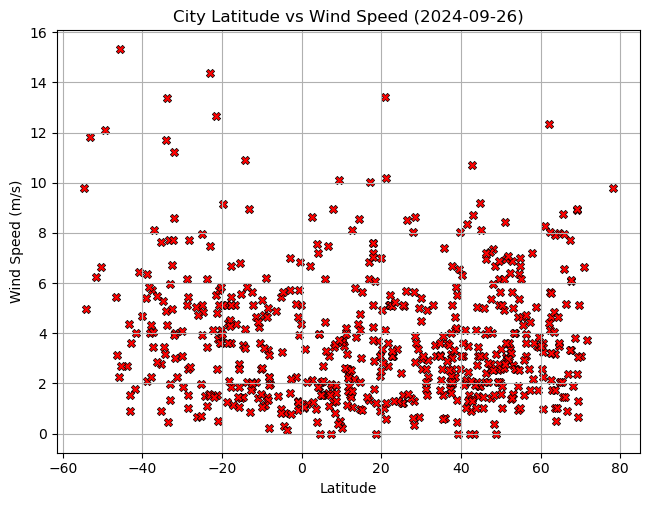

In [43]:
# Build the scatter plots for latitude vs. wind speed
build_scatter("Lat","Wind Speed")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig4.png", bbox_inches="tight")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, c="blue", marker="X", edgecolor="black", linewidths=0.5)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,olonkinbyen,70.9221,-8.7187,-0.61,84,100,6.64,SJ,1727318215
3,leshan,29.5623,103.7639,29.70,58,100,0.67,CN,1727318217
5,chagoda,59.1640,35.3285,14.68,67,19,3.47,RU,1727318219
9,iqaluit,63.7506,-68.5145,5.85,75,75,1.03,CA,1727318223
10,thompson,55.7435,-97.8558,16.09,82,75,1.54,CA,1727318224


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,poso,-1.3959,120.7524,31.16,61,92,2.25,ID,1727318213
1,adamstown,-25.0660,-130.1015,20.65,90,91,7.95,PN,1727318214
4,edinburgh of the seven seas,-37.0676,-12.3116,13.90,85,100,8.12,SH,1727318218
6,acarau,-2.8856,-40.1200,24.99,82,43,7.00,BR,1727318220
7,malango,-2.9627,119.9001,26.11,73,98,1.61,ID,1727318221


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8564838608882192


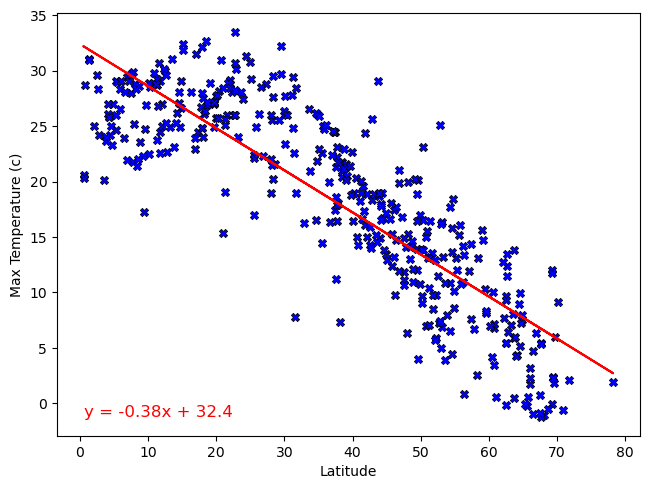

In [47]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

The r-value is: 0.7985794504771023


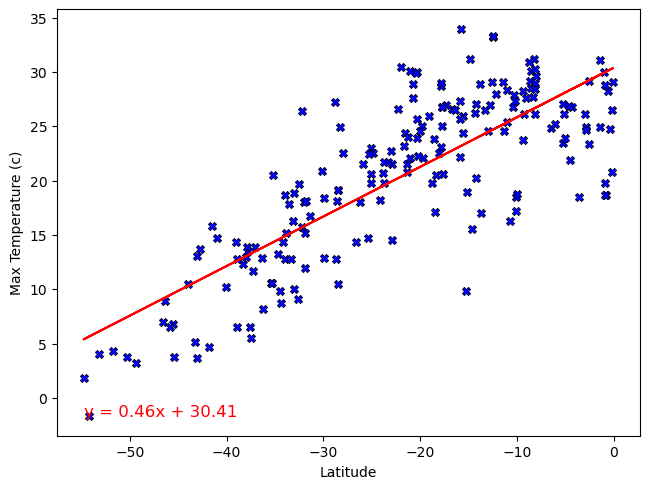

In [48]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.11312983536483306


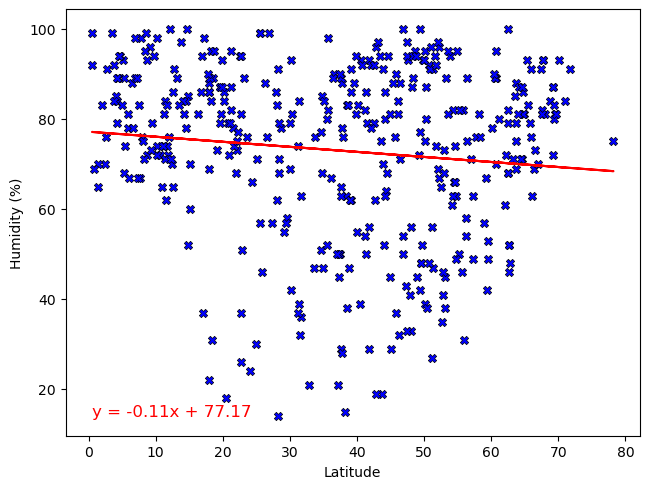

In [49]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

The r-value is: -0.016756620300097076


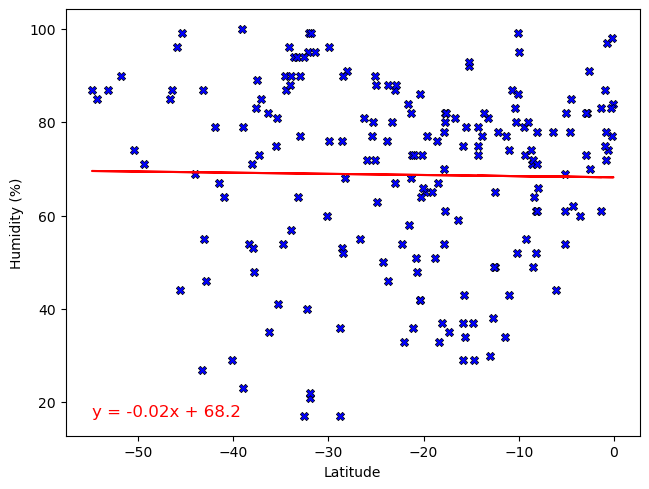

In [50]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
- Although there's little correlation between Latitude and Humidity, you can clearly see within the scatter plots that for both the Northern and Southern Hemisphere, city's located closest to the equator have Humidity levels > 60%.
- It would be interesting to look at the city correlation of -10 to 10 latitude degrees from the equator and the Humidity to see if a stronger correlation exists without the outliers of further latitudes affecting the result.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0015229132186909218


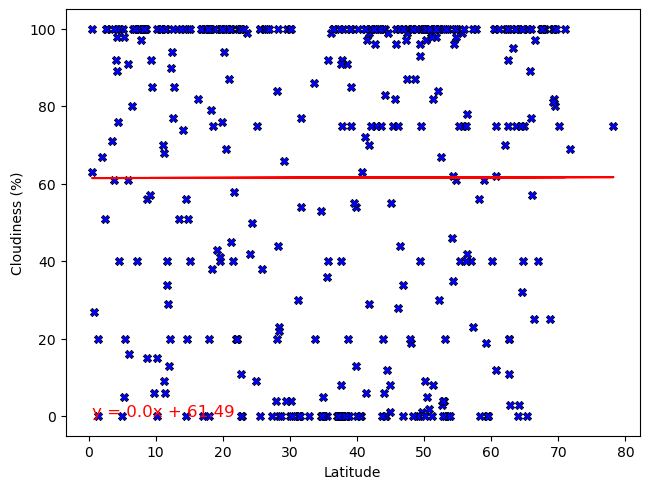

In [51]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

The r-value is: -0.007372557916045457


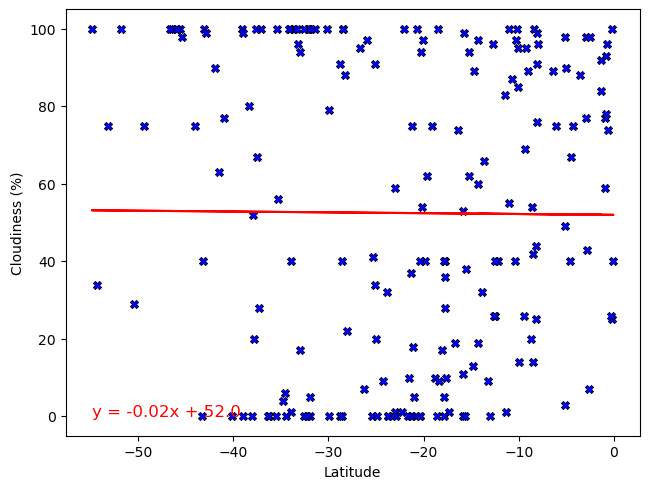

In [52]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
- Much like Humidity, there's very little correlation between Cloudiness and a City's Latitude.
- The scatter plots show that cities in the northern hemisphere have much more cloud coverage above 60% than that of the southern hemisphere cities.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.12791077506996845


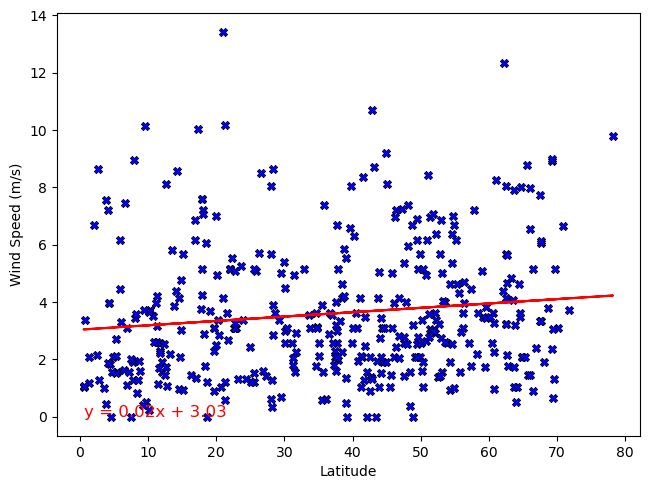

In [53]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

The r-value is: -0.29876415184814553


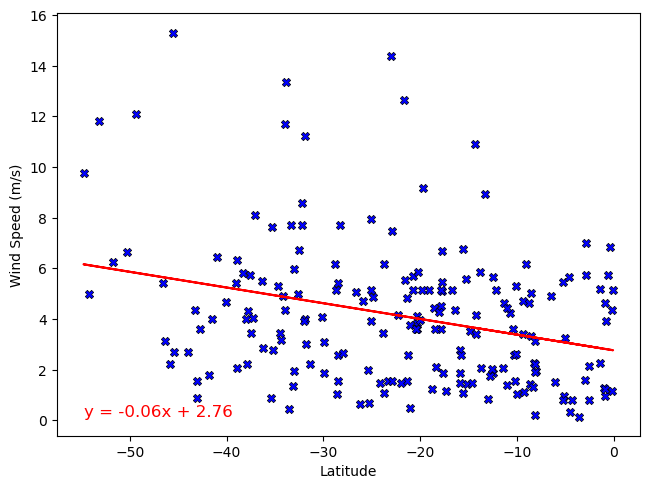

In [54]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
- Again there's very little correlation between Wind Speed and City Latitude for both Northern and Southern Hemisphere Cities.